### Image recognition

In [1]:
#id first_training
#caption Results from the first training
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 83.1MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.163427,0.023942,0.008796,00:47


epoch,train_loss,valid_loss,error_rate,time
0,0.053648,0.010062,0.004060,00:46


In [2]:
uploader = SimpleNamespace(data = ['/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_150.jpg'])

In [3]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.000014


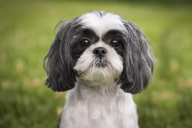

In [4]:
img = PILImage.create('/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_150.jpg')
img.to_thumb(192)

### Object recognition in an image

In [5]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
 path, bs=8, fnames = get_image_files(path/"images"),
 label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
 codes = np.loadtxt(path/'codes.txt', dtype=str)
)
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.731901,2.284748,00:01


epoch,train_loss,valid_loss,time
0,1.929134,1.519065,00:02
1,1.646193,1.292068,00:01
2,1.498640,1.333871,00:01
3,1.386958,0.975160,00:01
4,1.258726,0.898316,00:01
5,1.148226,0.829318,00:01
6,1.053490,0.789548,00:01
7,0.978376,0.777932,00:01


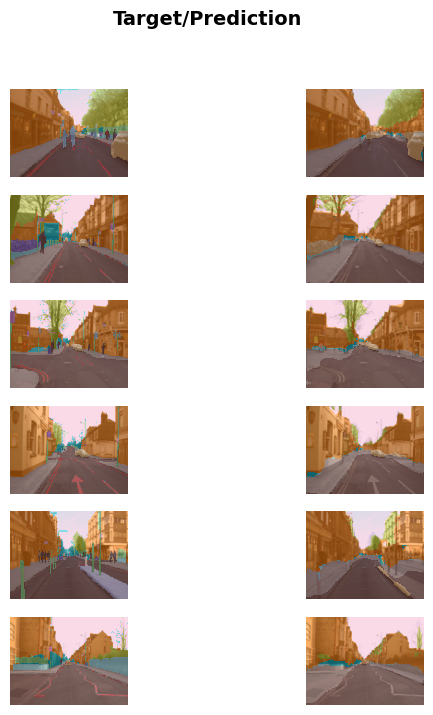

In [6]:
learn.show_results(max_n=6, figsize=(7,8))

### Sentiment Analysis of movie reviews

In [7]:
from fastai.text.all import *
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

epoch,train_loss,valid_loss,accuracy,time
0,0.472682,0.398940,0.819960,02:35


epoch,train_loss,valid_loss,accuracy,time
0,0.302192,0.251111,0.900360,04:23
1,0.254856,0.205780,0.916600,04:23
2,0.196314,0.185190,0.928760,04:23
3,0.149016,0.192837,0.927360,04:23


In [8]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([2.3695e-04, 9.9976e-01]))

In [9]:
learn.predict("Margot does the best with what she's given, but this film was very disappointing to me. It was marketed as a fun, quirky satire with homages to other movies. It started that way, but ended with over-dramatized speeches and an ending that clearly tried to make the audience feel something, but left everyone just feeling confused. And before you say I'm a crotchety old man, I'm a woman in my 20s, so I'm pretty sure I'm this movie's target audience. The saddest part is there were parents with their kids in the theater that were victims of the poor marketing, because this is not a kid's movie. Overall, the humor was fun on occasion and the film is beautiful to look at, but the whole concept falls apart in the second half of the film and becomes a pity party for the 'strong' woman.")

('neg', tensor(0), tensor([0.9570, 0.0430]))